# Set up 

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from janitor import clean_names
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')

In [17]:
recent_grad = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-16/recent-grads.csv")

recent_grad = clean_names(recent_grad)
recent_grad['major'] = recent_grad['major'].str.title()

In [18]:
recent_grad.head()

,rank,major_code,major,total,men,women,major_category,sharewomen,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
0,1,2419,Petroleum Engineering,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,Mining And Mineral Engineering,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,Metallurgical Engineering,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,Naval Architecture And Marine Engineering,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,Chemical Engineering,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


# Exploratory Data Analysis

In [23]:
by_major_category = ((recent_grad
    .assign(median_weighted=recent_grad['median'] * recent_grad['sample_size'])
    .groupby(['major_category']).agg({
    'total': 'sum',
    'women': 'sum',
    'men': 'sum',
    'median_weighted': 'sum',
    'sample_size': 'sum'}).assign(
    share_women=lambda x: x.women / x.total,
    median_salary=lambda x: x.median_weighted / x.sample_size))
                     .sort_values(by='share_women', ascending=False)).reset_index()

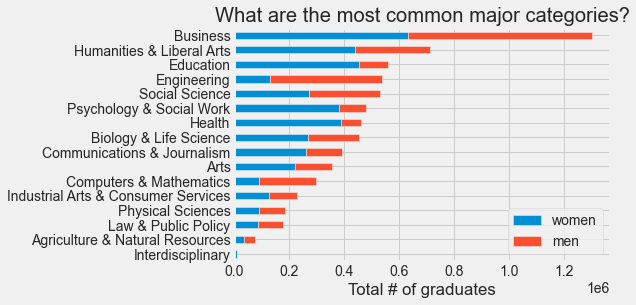

In [26]:
by_major_category\
    .sort_values(by='total')[['major_category', 'women', 'men']]\
    .plot.barh(x='major_category', stacked=True)
plt.title("What are the most common major categories?")
plt.xlabel("Total # of graduates")
plt.ylabel("")
plt.show()

## What majors are earning the most? 

Text(-192.88, 0.5, '')

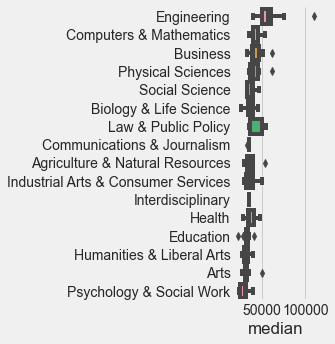

In [21]:
(recent_grad.assign(
    major_median = recent_grad
    .groupby('major_category')['median']
    .transform('median'))
    .sort_values(by='major_median', ascending=False)
    .pipe((sns.catplot, 'data'),
         x='median',
         y='major_category',
         kind='box'))
plt.ylabel("")

In [8]:
grad_processing = recent_grad.sort_values(
    by='median', ascending=False)[['major', 'major_code', 'major_category', 'sample_size', 'p25th', 'median','p75th']]

grad_processing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   major           173 non-null    object
 1   major_code      173 non-null    object
 2   major_category  173 non-null    object
 3   sample_size     173 non-null    int64 
 4   p25th           173 non-null    int64 
 5   median          173 non-null    int64 
 6   p75th           173 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 10.8+ KB


<Figure size 1296x648 with 0 Axes>

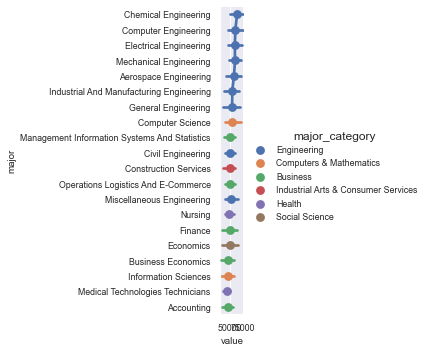

In [22]:
sns.set(font_scale=0.8)
plt.figure(figsize=(18,9))
g = (grad_processing[grad_processing['sample_size'] >= 100]
 .head(20)
 .melt(id_vars=['major', 'major_code', 'major_category', 'sample_size'])
 .pipe((sns.catplot, 'data'),
       x='value',
       y='major',
       hue='major_category',
       kind = 'point'))
